## https://www.kaggle.com/learn/intro-to-machine-learning

#### [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course/overview)

https://www.kaggle.com/michaelchen0919/exercise-machine-learning-competitions/edit

https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/557816/

epoch, batchsize, iteration

https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/557816/

example:有一個2000個訓練樣本的資料集。將2000個樣本分成大小為500的batch,那麼完成一個epoch需要4個iteration。

# Decision Tree

### Case One

In [ ]:
import pandas as pd

In [ ]:
# 為路徑賦值
melbourne_file_path = '/content/drive/My Drive/Colab Notebooks/melb_data.csv'

In [ ]:
melbourne_data = pd.read_csv(melbourne_file_path) 

In [ ]:
# print(melbourne_data)

              Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 21 columns]


In [ ]:
# 呈現出數據的大概
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
#列出所有欄位判斷哪些欄位會影響判斷
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# dropna drops missing values (think of na as "not available")
# 去掉NA ---> 背後還有很多問題
melbourne_data = melbourne_data.dropna(axis=0)

In [ ]:
# 將要送入 x, y 裡面跑得 y 決定在 Price 這個欄位 ---> 但斷那個欄位是有影響可以作為 y 的
y = melbourne_data.Price

In [ ]:
# 先列出欄位作為 x 的欄位 ---> 自己選擇可以作為特徵的欄位 ---> 哪些因素會影響價格？
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [ ]:
# 將欄位挑選出來
X = melbourne_data[melbourne_features]

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954



# Building Your Model
You will use the scikit-learn library to create your models. When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

**Define**: What type of model will it be? A decision tree? Some other type of 
model? Some other parameters of the model type are specified too.

**Fit**: Capture patterns from provided data. This is the heart of modeling.

**Predict**: Just what it sounds like

**Evaluate**: Determine how accurate the model's predictions are.
Here is an example of defining a decision tree model with scikit-learn and 

**fitting** it with the features and target variable.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Define model. Specify a number for random_state to ensure same results each run
# 定義模型 
# random_state=1 
melbourne_model = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit model
# 將上面的 X,y 給 fit 進去
# 這個 fit 應該就是訓練的過程
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
# 先呈現要放進去預測的表格
# 預測 X.tail 的數字 ---> 先列出來看
print("Making predictions for the following 5 houses:")
print(X.tail())

Making predictions for the following 5 houses:
       Rooms  Bathroom  Landsize  Lattitude  Longtitude
12205      3       2.0     972.0  -37.51232   145.13282
12206      3       1.0     179.0  -37.86558   144.90474
12207      1       1.0       0.0  -37.85588   144.89936
12209      2       1.0       0.0  -37.85581   144.99025
12212      6       3.0    1087.0  -37.81038   144.89389


In [ ]:
# 在predict函數的調用下,給出預測
print("The predictions are")
# 這裡是預測 x.tail() 的這五棟房子
print(melbourne_model.predict(X.tail()))

The predictions are
[ 601000. 1050000.  385000.  560000. 2450000.]


In [ ]:
# 預測全部
melbourne_model.predict(X)

array([1035000., 1465000., 1600000., ...,  385000.,  560000., 2450000.])

**Model** **Validation**

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

*error*=actual−predicted

In [ ]:
# 導入MAE模組
# error=actual−predicted
from sklearn.metrics import mean_absolute_error

In [ ]:
# 預測結果 ---> 將 X 放進去模型裡面
predicted_home_prices = melbourne_model.predict(X)

In [ ]:
# error=actual(y)−predicted(X) ---> 計算 MAE
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

**The** **Problem** **with** **bold text**"**In** **bold text**-**Sample**" **Scores**

The scikit-learn library has a function **train_test_split** to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate **mean_absolute_error**.

# [平均絕對誤差的基本解釋](https://staruphackers.com/%E4%BB%80%E9%BA%BC%E6%98%AF%E5%B9%B3%E5%9D%87%E7%B5%95%E5%B0%8D%E8%AA%A4%E5%B7%AE-mean-absolute-error-mae%EF%BC%9F/)

對同一物理量進行多次測量時，各次測量值及其絕對誤差不會相同，我們將各次測量的絕對誤差取絕對值後再求平均值，並稱其為平均絕對誤差。

平均絕對誤差是所有單個觀測值與算術平均值的偏差的絕對值的平均。與平均誤差相比，平均絕對誤差由於離差被絕對值化，不會出現正負相抵消的情況，因而，平均絕對誤差能更好地反映預測值誤差的實際情況。

In [ ]:
# 導入函示將數據分為二個：訓練資料＆驗證資料
from sklearn.model_selection import train_test_split

In [ ]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:
# Define model
# 這裡沒有放 random_state 
melbourne_model = DecisionTreeRegressor()

In [ ]:
# Fit model
# 在這個階段就透過train資料訓練好模型
melbourne_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# get predicted prices on validation data
# 將訓練好的模型 melbourne_model 用來預測 val_X 
# 再將 val_y 來計算 MAE (mean-absolute-error)
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

270772.52636109316


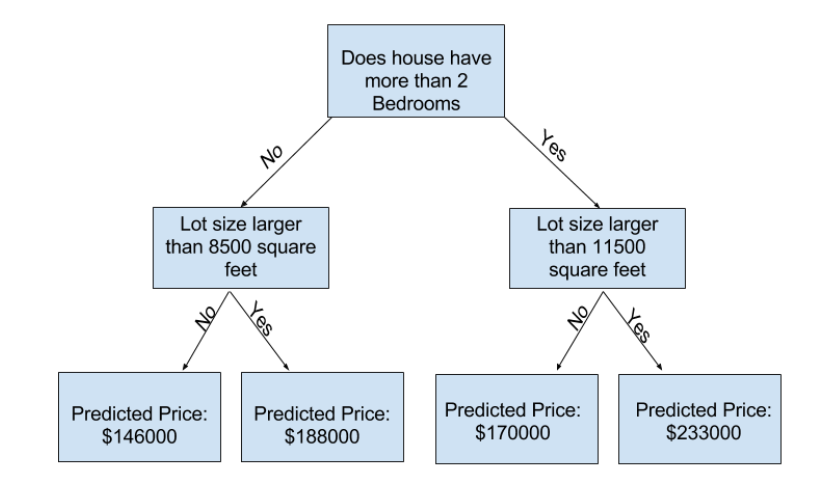

[sklearn model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

個人猜測,這個模型的算法,主要是根據我們所選擇的欄位(X),去建立分叉路,機器會判讀每個欄位的特徵,建立一個分類的標準,然後一層一層的建立一下,最後則是將所有結論歸結到 y 

#### **Overfitting**
When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).This is a phenomenon called **overfitting**, **where a model matches the training data almost perfectly, but does poorly in validation and other new data.** On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

#### **Underfitting**
At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. **Visually, we want the low point of the (red) validation curve in**

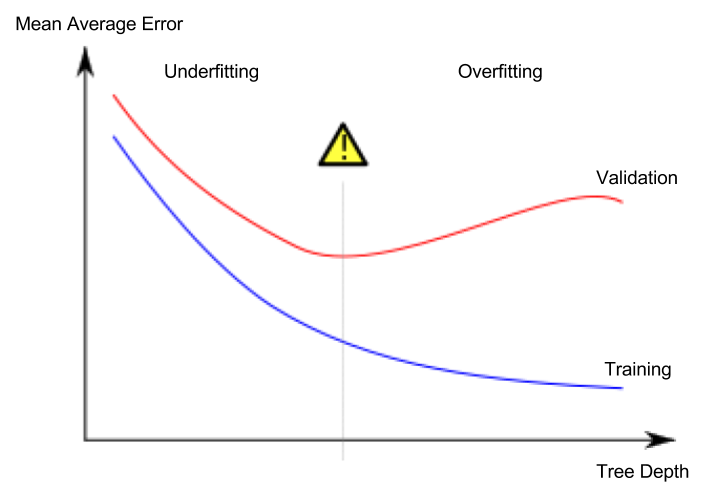

#### **max_leaf_nodes**

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen (and which you've already written).

In [ ]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = '/content/drive/My Drive/Colab Notebooks/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    # 在原本的model中, 加入另外一個參數 - max_leaf_nodes ---> 透過自己寫的 function ---> get_mae 帶入 max_leaf_nodes 的值為多少 
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 這行不變, 將訓練資料帶入 fit 那個 model ---> 訓練資料
    model.fit(train_X, train_y)
    # 將驗證資料帶入得到驗證的值
    preds_val = model.predict(val_X)
    # 再用驗證的價值去計算 mae
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


Max leaf nodes: 5  		 Mean Absolute Error:  347380<br>
Max leaf nodes: 50  		 Mean Absolute Error:  258171<br>
**Max leaf nodes: 500  		 Mean Absolute Error:  243495<br>**
Max leaf nodes: 5000  		 Mean Absolute Error:  254983<br>

Of the options listed, 500 is the optimal number of leaves.

#### Conclusion
<br>
Here's the takeaway: Models can suffer from either:

Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.



### Case Two

In [ ]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


FileNotFoundError: ignored

# Random Forest

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

### Case One

In [ ]:
import pandas as pd
    
# Load data
melbourne_file_path = '/content/drive/My Drive/Colab Notebooks/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


### Conclusion
There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

### Case Two

Step 1: Use a Random Forest

Here's the code you've written so far.

In [ ]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


FileNotFoundError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)


# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

NameError: ignored